In [46]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axisartist.axislines import AxesZero

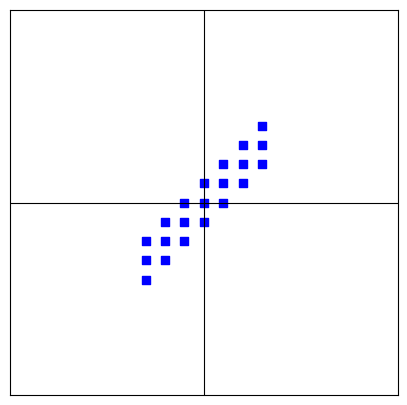

In [97]:
fig = plt.figure(figsize = (5, 5), dpi = 100)
ax = fig.add_subplot(axes_class=AxesZero)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])

for orientation in ["xzero", "yzero"]:
    ax.axis[orientation].set_visible(True)
    # добавляет ось абсцисс и ординат в вывод

for orientation in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[orientation].set_visible(True)
    # добавляет границы в вывод

def gen_rectangle(start, end):
    x = [i for i in range(start, end, 1)]
    y = [0] * (abs(start) + abs(end))
    ax.scatter(x, y, marker = 's', color = 'blue')
    
def gen_triangle(start, end):
    x = [i for i in range(start, end, 1)]
    y = [0] * (abs(start) + abs(end))
    ax.scatter(x, y, marker = '^', color = 'red')

def gen_hexagon(start, end):
    x = [i for i in range(start, end, 1)]
    y = [0] * (abs(start) + abs(end))
    ax.scatter(x, y, marker = 'H', color = 'green')

def tr_translate(count, start, end, type_fig):
    type_fig = str(type_fig)
    if type_fig == 'triangle':
        x = [i for i in range(start, end, 1)]
        y = [count]*(abs(start) + abs(end))
        ax.scatter(x, y, marker = '^', color = 'red')
            
    elif type_fig == 'square':
        x = [i for i in range(start, end, 1)]
        y = [count]*(abs(start) + abs(end))
        ax.scatter(x, y, marker = 's', color = 'blue')
            
    elif type_fig == 'hexagon':
        x = [i for i in range(start, end, 1)]
        y = [count]*(abs(start) + abs(end))
        ax.scatter(x, y, marker = 'H', color = 'green')

def tr_rotate(start, end, type_fig):
    type_fig = str(type_fig)
    if type_fig == 'triangle':
        x = [0] * (abs(start) + abs(end))
        y = [i for i in range(start, end, 1)]
        ax.scatter(x, y, marker = '^', color = 'red')
            
    elif type_fig == 'square':
        x = [0] * (abs(start) + abs(end))
        y = [i for i in range(start, end, 1)]
        ax.scatter(x, y, marker = 's', color = 'blue')
            
    elif type_fig == 'hexagon':
        x = [0] * (abs(start) + abs(end))
        y = [i for i in range(start, end, 1)]
        ax.scatter(x, y, marker = 'H', color = 'green')

def tr_symmetry(ox, start, end, type_fig):
    type_fig = str(type_fig)
    if type_fig == 'triangle':
        x = [ox] * (abs(start) + abs(end))
        y = [i for i in range(start, end, 1)]
        x_sym = [-ox] * (abs(start) + abs(end))
        ax.scatter(x, y, marker = '^', color = 'red')
        ax.scatter(x_sym, y, marker = '^', color = 'red')
            
    elif type_fig == 'square':
        x = [ox] * (abs(start) + abs(end))
        y = [i for i in range(start, end, 1)]
        x_sym = [-ox] * (abs(start) + abs(end))
        ax.scatter(x, y, marker = 's', color = 'blue')
        ax.scatter(x_sym, y, marker = 's', color = 'blue')
            
    elif type_fig == 'hexagon':
        x = [ox] * (abs(start) + abs(end))
        y = [i for i in range(start, end, 1)]
        x_sym = [-ox] * (abs(start) + abs(end))
        ax.scatter(x, y, marker = 'H', color = 'green')
        ax.scatter(x_sym, y, marker = 'H', color = 'green')

def three_paral(start, end):
    x = [i for i in range(start, end, 1)]
    for y in range(3):
        axes = [(y - 4) + i for i in range(abs(start) + abs(end))]
        ax.scatter(x, axes, marker = 's', color = 'blue')

def cross(k, start, end):
    x = [i for i in range(start, end, 1)]
    for y in range(2):
        if y % 2 == 0:
            axes = [(0 + i)*k for i in range(abs(start) + abs(end))]
            ax.scatter(x, axes, marker = 's', color = 'blue')
        else:
            axes = [(0 + i)*k for i in range(abs(start) + abs(end), 0, -1)]
            ax.scatter(x, axes, marker = 's', color = 'blue')

def triangle_paral(start, end):
    x = [i for i in range(start, end, 1)]
    for y in range(2):
        if y % 2 == 0:
            axes = [y] * (abs(start) + abs(end))
            ax.scatter(x, axes, marker = '^', color = 'red')
        else:
            axes = [y] * (abs(start) + abs(end))
            ax.scatter(x, axes, marker = 'v', color = 'red')


three_paral(-3, 4)